# Making a map of hydroelectric stations in Argentina

I will be using Pandas, GeoPandas, and MatplotLib

The data of the hydroelectric stations was obtained through the argentinian government website. 

The political argentinian map was obtained here: https://map.igismap.com/analysis/map/13749/gisData757

In [75]:
import geopandas as gpd
%matplotlib inline

In [80]:
argentina = gpd.read_file('estacioneslatlong-utf8.csv', encoding='utf-8')


This is the original file structure. We need to change this into a proper GeoDataFrame

In [81]:
argentina

,Nombre,LAT,LONG,geometry
0,Añatuya-RP 92,-28.50,-62.88,None
1,Caimancito,-23.71,-64.54,None
2,Sayate,-22.90,-65.85,None
3,TINOGASTA,-28.08,-67.58,None
4,CABO SAN MIGUEL,-27.40,-65.98,None
...,...,...,...,...
460,LAGUNA DIAMANTE,-34.20,-69.70,None
461,TOSCAS,-33.16,-69.89,None
462,LAS LEÑAS,-35.14,-70.09,None
463,CERRO NEGRO,-29.89,-69.56,None


The next function will create our geometry column

In [5]:
argentina['geometry']=gpd.points_from_xy(argentina.LONG, argentina.LAT)

In [6]:
argentina.head()

,Nombre,LAT,LONG,geometry
0,Caimancito,-23.71,-64.54,POINT (-64.54000 -23.71000)
1,Sayate,-22.90,-65.85,POINT (-65.85000 -22.90000)
2,TINOGASTA,-28.08,-67.58,POINT (-67.58000 -28.08000)
3,CABO SAN MIGUEL,-27.40,-65.98,POINT (-65.98000 -27.40000)
4,Pie de Medano,-27.00,-66.22,POINT (-66.22000 -27.00000)


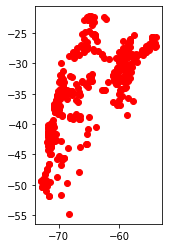

In [7]:
ax = argentina.plot(color = 'red')

There are the argentinian hydraulic energy stations. But this map is sort of lacking something: an actual political map. Lets put one there. 

In [8]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
political_argentina_map = gpd.read_file('argentina_administrative_boundaries_province_polygon.kml', driver='KML')

In [9]:
political_argentina_map.head()

,Name,Description,geometry
0,Tierra del Fuego,,"POLYGON ((-68.26651 -54.86977, -68.26557 -54.8..."
1,Tierra del Fuego,,"POLYGON ((-68.25848 -54.84744, -68.25846 -54.8..."
2,Tierra del Fuego,,"POLYGON ((-68.24592 -54.87810, -68.24577 -54.8..."
3,Tierra del Fuego,,"POLYGON ((-68.25344 -54.87510, -68.25320 -54.8..."
4,Tierra del Fuego,,"POLYGON ((-68.24273 -54.85912, -68.24228 -54.8..."


<AxesSubplot:title={'center':'Hydroelectric stations in Argentina'}>

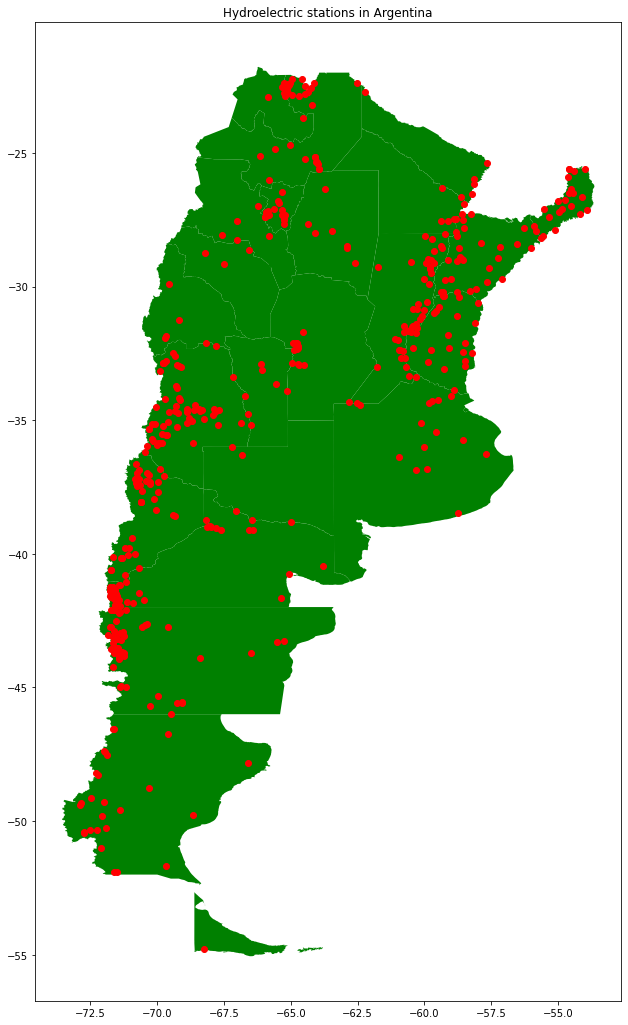

In [10]:
ax = political_argentina_map.plot(color='green', markersize = 1,zorder=0, figsize=(30,18))
ax.set_title('Hydroelectric stations in Argentina')
minx, miny, maxx, maxy = political_argentina_map.geometry.total_bounds
argentina.plot(color = 'red', ax=ax)


# Folium : Interactive Map

In [82]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [83]:
map_hidro = folium.Map(location=[-35,-58], tiles='openstreetmap', zoom_start=4)

In [55]:
map_hidro

In [84]:

#now we add the markers
mc = MarkerCluster()
for i in range(0, len(argentina)):
    folium.Marker(
        location = [argentina.iloc[i]['LAT'], argentina.iloc[i]['LONG']],
                    popup=folium.Popup(argentina.iloc[i]['Nombre'], parse_html=True),
                    icon=folium.DivIcon(html=f"""<div><svg><rect x="0" y="0" width="20" height="20" fill="#FF0000" /></svg></div>""")
                    ).add_to(mc)
map_hidro.add_child(mc) 

In [85]:
map_hidro.save("map.html")